### EDA

In [1]:
import pandas as pd

i = pd.read_csv('insurance.csv')
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
i.shape

(1338, 7)

In [3]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
i['charges'] = i['charges'].apply(lambda x: float(x))

In [6]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
i['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
i.replace({'sex':{'male':0, 'female':1}}, inplace = True)

In [9]:
i['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
i.replace({'smoker':{'no':0, 'yes':1}}, inplace = True)

In [11]:
i['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
i.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace = True)

In [13]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### Data Visualization

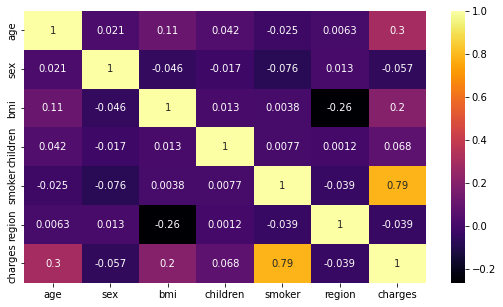

In [15]:
c = i.corr()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (9,5))
sns.heatmap(c, annot = True, cmap = 'inferno');

In [17]:
abs(c['charges']).sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.039473
Name: charges, dtype: float64

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


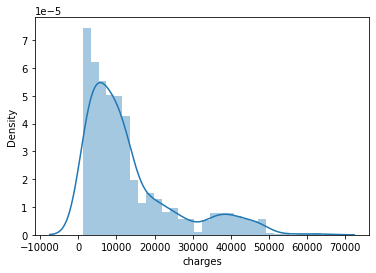

In [19]:
sns.distplot(i['charges']);

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


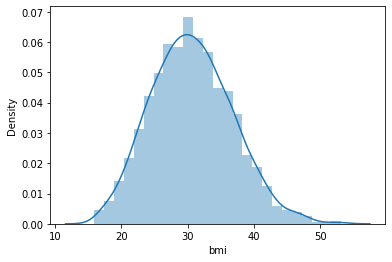

In [20]:
sns.distplot(i['bmi']);

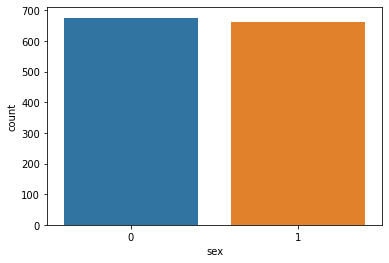

In [23]:
sns.countplot(x = 'sex', data = i);

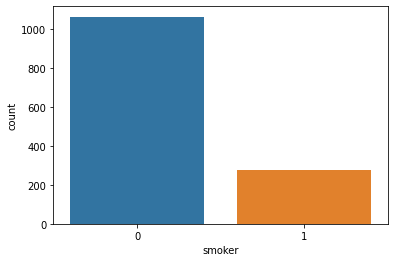

In [24]:
sns.countplot(x = 'smoker', data = i);

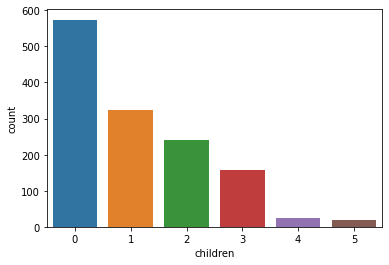

In [25]:
sns.countplot(x = 'children', data = i);

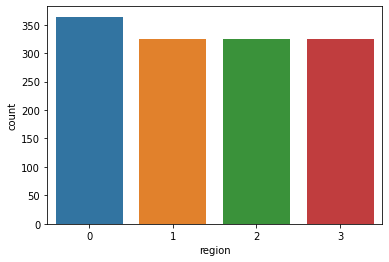

In [26]:
sns.countplot(x = 'region', data = i);

### Model

In [27]:
X = i.drop('charges', axis = 1)
y = i['charges']

In [28]:
from sklearn.model_selection import train_test_split

a, d, s, f = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
print(a.shape)
print(s.shape)
print(d.shape)
print(f.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [30]:
from sklearn.ensemble import RandomForestRegressor

m = RandomForestRegressor()
m.fit(a,s)
g = m.predict(d)

In [31]:
from sklearn.metrics import r2_score

print('r2_score : ',r2_score(f,g))

r2_score :  0.8642727264257088


In [39]:
f = list(f)
g = list(g)

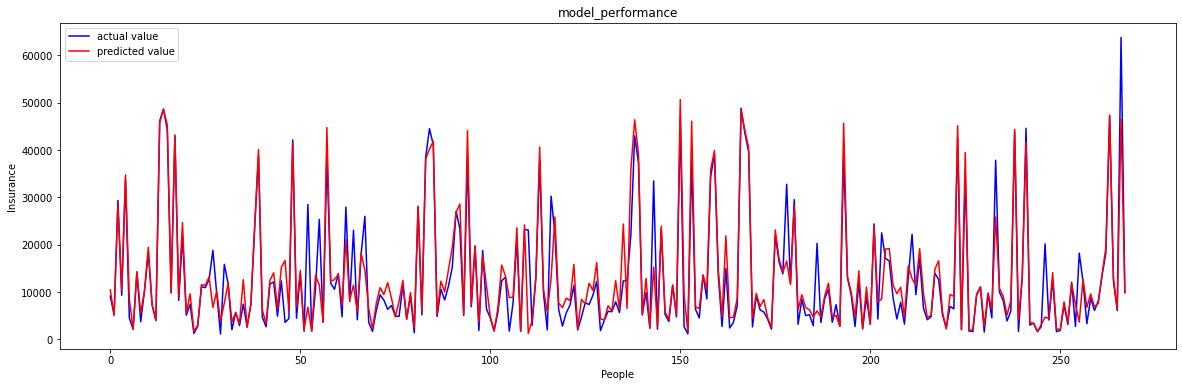

In [40]:
plt.figure(figsize=(20,6))
plt.plot(f, color = 'b', label = 'actual value')
plt.plot(g, color = 'r', label = 'predicted value')
plt.title('model_performance')
plt.xlabel('People')
plt.ylabel('Insurance')
plt.legend();